<a href="https://colab.research.google.com/github/Kilvia/tf-data-handle/blob/main/TF_data_handle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # TensorFlow Input Data Handling

Handling data well in data science is the basis of the basics. This is the same when learning Tensorflow.

It is important to be well aware of techniques that can process data well and efficiently. In order to cultivate this ability, this practice will introduce Tensorflow's data-related APIs. There are several related APIs, but the practice will cover the API below.
- Keras data API
- Keras preprocess API
- Tensorflow data API

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import requests
import ssl
from sklearn import model_selection

In [2]:
requests.packages.urllib3.disable_warnings()

In [3]:
try:
  _create_unverified_https_context = ssl._create_default_https_context
except AttributeError:
  pass
else:
  ssl._create_default_https_context = _create_unverified_https_context

### Keras dataset

Keras provides small datasets that are commonly used, and can be received as numpy arrays through load_data(). Some examples are:

* boston_housing module: Boston housing price regression dataset.
* cifar10 module: CIFAR10 small images classification dataset.
* cifar100 module: CIFAR100 small images classification dataset.
* fashion_mnist module: Fashion-MNIST dataset.
* imdb module: IMDB sentiment classification dataset.
* mnist module: MNIST handwritten digits dataset.
* reuters module: Reuters topic classification dataset.

In [73]:
cifar10 = tf.keras.datasets.cifar10

# Load Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Split train set into train and valid
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train, test_size=0.2)


## Data preprocessing/augmentation using Keras layers



In [74]:
data_aug = tf.keras.Sequential([
    # Convert data from integers between 0-255 into real numbers between 0-1
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255.0),
    # Up/down/left/right (random flip)
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    # Rotation (2pi * 20%) (RandomRotation)
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

### Model

In [75]:
model = tf.keras.models.Sequential(([
    data_aug,
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
]))

Alternatively, the data may be configured to be processed in the following manner without being included in the model.

In [76]:
print(x_train.shape)
# Data preprocessing/augmentation for training image
x_train = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(x_train)
x_train = tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical')(x_train)
x_train = tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)(x_train)

# Data preprocessing/augmentation for validation/test image
x_valid = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(x_valid)
x_test = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(x_valid)

(40000, 32, 32, 3)


### Image Data Generator

In [77]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [78]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0,
    vertical_flip = True,
    # Degree
    rotation_range = 72
)

In [79]:
batch_x, batch_y = next(datagen.flow(x_train, y_train, batch_size=32, shuffle=True))
print(batch_x.shape)
print(batch_y.shape)

(32, 32, 32, 3)
(32, 1)


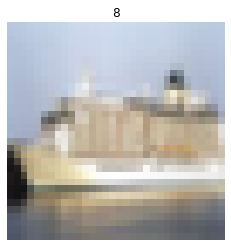

In [80]:
# Visualize single data
def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(label[0])
  plt.axis('off')

show(batch_x[0], batch_y[0])

In [81]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [82]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(loss=loss_fn, optimizer='adam', metrics=['accuracy'])

Training

In [83]:
model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=10)


Epoch 1/10
1562/1562 [==============================] - 172s 110ms/step - loss: 1.7996 - accuracy: 0.1133
Epoch 2/10
1562/1562 [==============================] - 170s 109ms/step - loss: 1.5944 - accuracy: 0.1034
Epoch 3/10
1562/1562 [==============================] - 166s 107ms/step - loss: 1.5113 - accuracy: 0.1031
Epoch 4/10
1562/1562 [==============================] - 168s 108ms/step - loss: 1.4606 - accuracy: 0.1058
Epoch 5/10
1562/1562 [==============================] - 165s 106ms/step - loss: 1.4181 - accuracy: 0.1059
Epoch 6/10
1562/1562 [==============================] - 165s 106ms/step - loss: 1.3908 - accuracy: 0.1053
Epoch 7/10
1562/1562 [==============================] - 168s 108ms/step - loss: 1.3619 - accuracy: 0.1054
Epoch 8/10
1562/1562 [==============================] - 163s 104ms/step - loss: 1.3425 - accuracy: 0.1039
Epoch 9/10
1562/1562 [==============================] - 164s 105ms/step - loss: 1.3184 - accuracy: 0.1039
Epoch 10/10
1562/1562 [=======================